# Explore here

In [2]:
# Your code here
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", sep=';')
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Exploration and data cleaning 

In [4]:
print(f'Total data Shape: {df.shape}')
print(df.info())

Total data Shape: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  c

In [5]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

No null values found.

In [6]:
duplicates = df[df.duplicated()]
print(f'Total duplicate rows: {duplicates.shape[0]}')

Total duplicate rows: 12


In [7]:
duplicates.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [8]:
df = df.drop_duplicates()
print(f'Data shape after removing duplicates: {df.shape}')

Data shape after removing duplicates: (41176, 21)


## 3. Univariate Analysis 

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


CATEGORICAL:

In [19]:
#Display summary statistics for numerical columns
df[categorical_columns].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


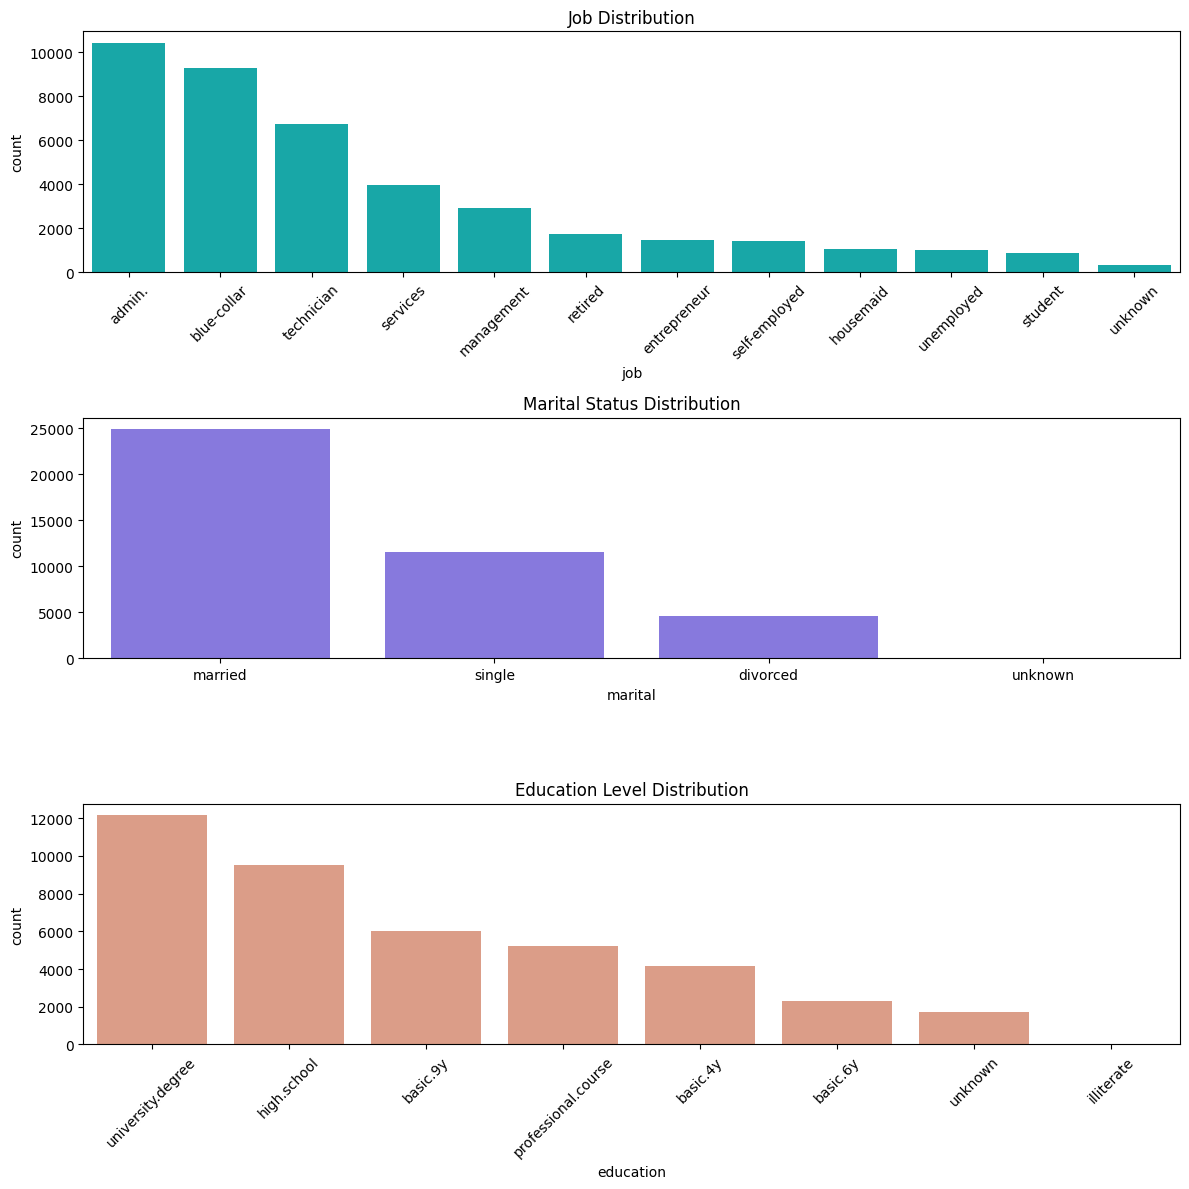

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))


sns.countplot(ax=ax[0], data=df, x="job", order=df['job'].value_counts().index, color='c')
ax[0].set_title('Job Distribution')
ax[0].tick_params(axis='x', rotation=45)


sns.countplot(ax=ax[1], data=df, x="marital", order=df['marital'].value_counts().index, color='mediumslateblue')
ax[1].set_title('Marital Status Distribution')

sns.countplot(ax=ax[2], data=df, x="education", order=df['education'].value_counts().index, color='darksalmon')
ax[2].set_title('Education Level Distribution')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Conclusion: 
Job: Most customers work in admin, blue-collar, and technician roles, indicating key target segments.

Marital Status: Married customers are the largest group, suggesting they may be more likely to invest in long-term deposits.

Education: University degree holders and high school graduates form the largest groups, highlighting a mix of educated customers with potential interest in financial products.

NUMERICAL

In [ ]:
df[numerical_columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


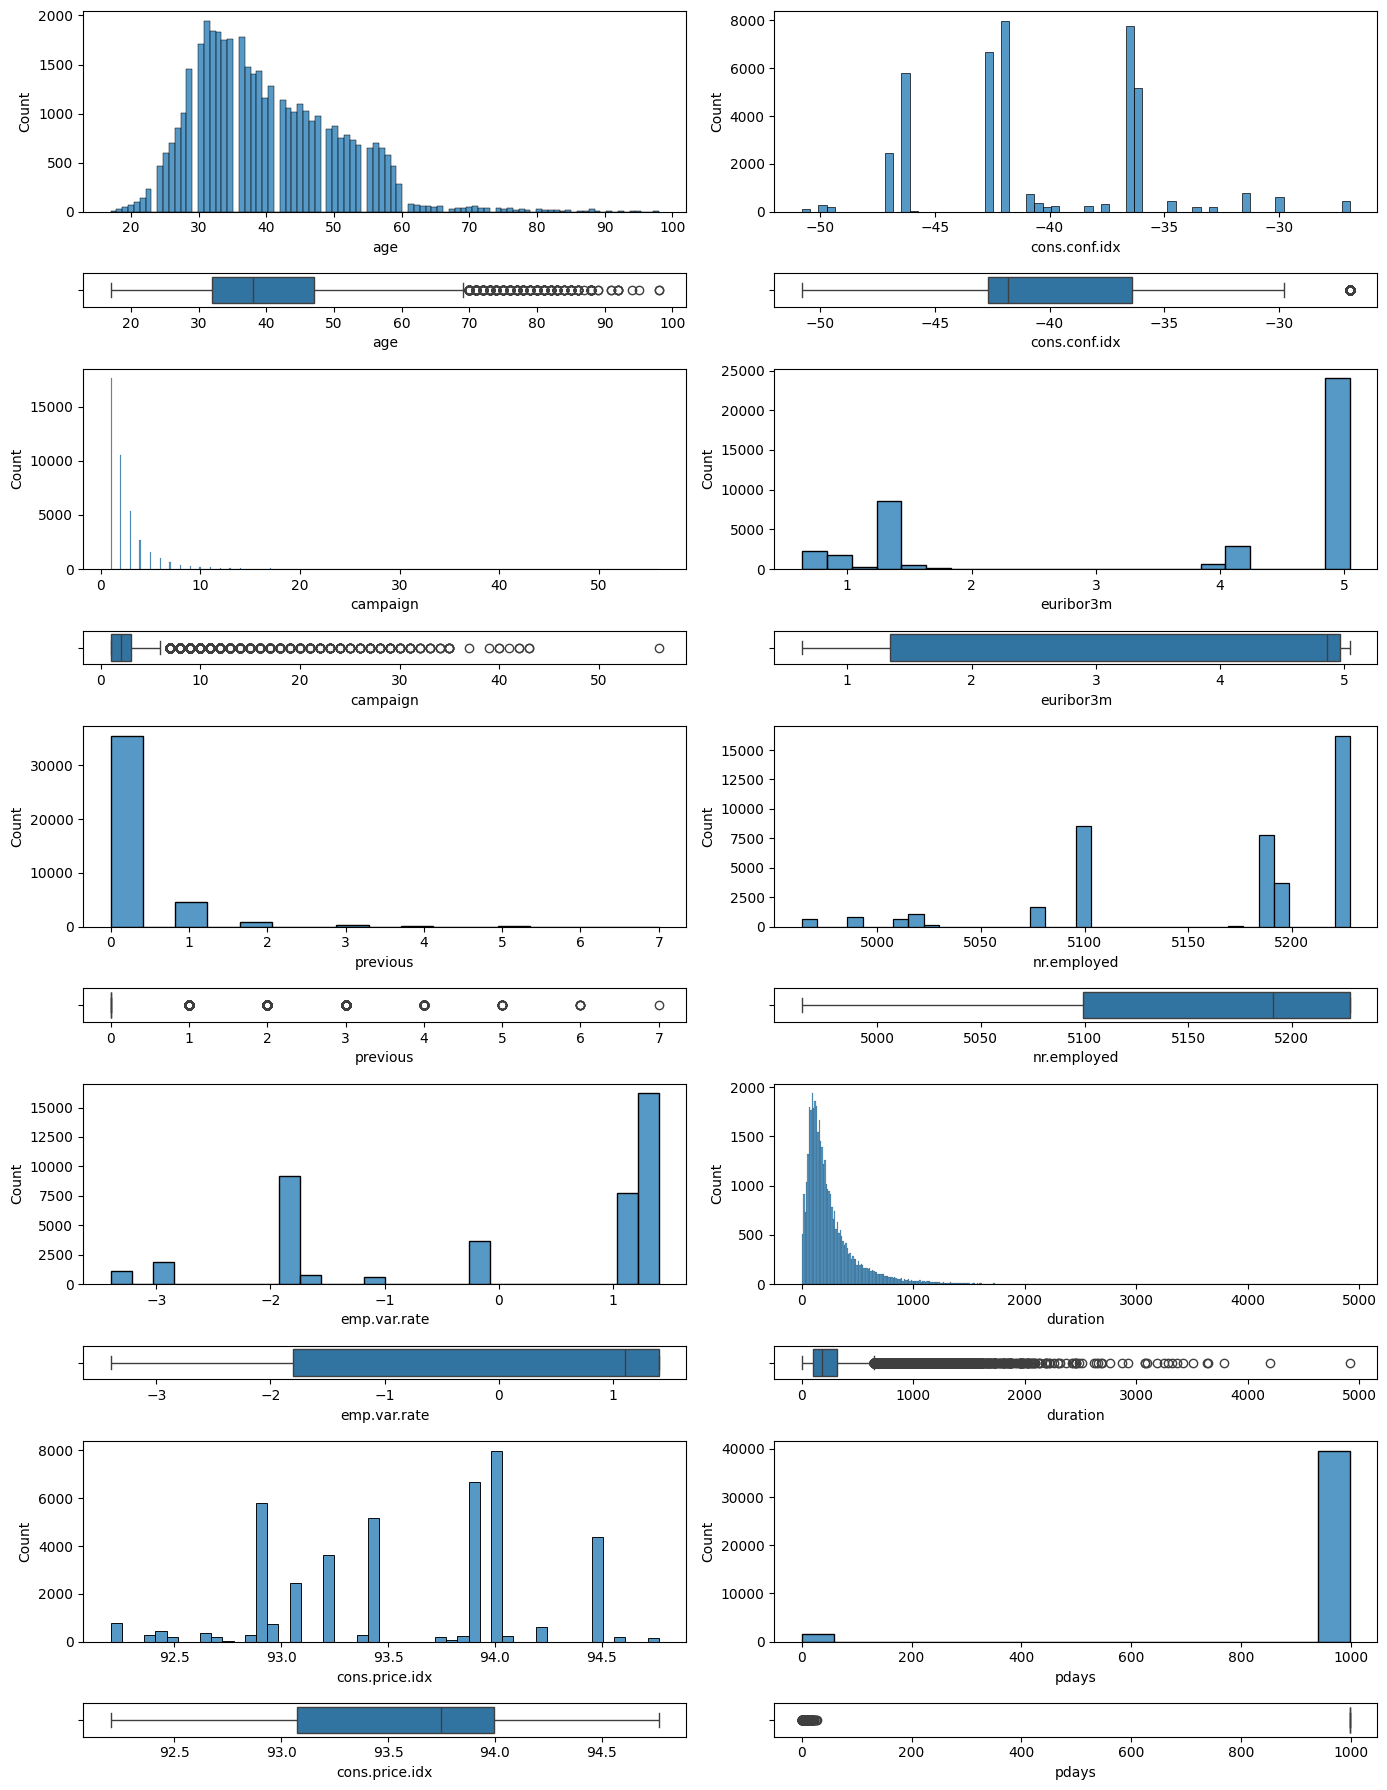

In [13]:
fig, ax = plt.subplots(10, 2, figsize=(14, 18), gridspec_kw={'height_ratios': [6, 1] * 5})

sns.histplot(data=df, x='age', ax=ax[0, 0])
sns.boxplot(data=df, x='age', ax=ax[1, 0])

sns.histplot(data=df, x='campaign', ax=ax[2, 0])
sns.boxplot(data=df, x='campaign', ax=ax[3, 0])

sns.histplot(data=df, x='previous', ax=ax[4, 0])
sns.boxplot(data=df, x='previous', ax=ax[5, 0])

sns.histplot(data=df, x='emp.var.rate', ax=ax[6, 0])
sns.boxplot(data=df, x='emp.var.rate', ax=ax[7, 0])

sns.histplot(data=df, x='cons.price.idx', ax=ax[8, 0])
sns.boxplot(data=df, x='cons.price.idx', ax=ax[9, 0])

sns.histplot(data=df, x='cons.conf.idx', ax=ax[0, 1])
sns.boxplot(data=df, x='cons.conf.idx', ax=ax[1, 1])

sns.histplot(data=df, x='euribor3m', ax=ax[2, 1])
sns.boxplot(data=df, x='euribor3m', ax=ax[3, 1])

sns.histplot(data=df, x='nr.employed', ax=ax[4, 1])
sns.boxplot(data=df, x='nr.employed', ax=ax[5, 1])

sns.histplot(data=df, x='duration', ax=ax[6, 1])
sns.boxplot(data=df, x='duration', ax=ax[7, 1])

sns.histplot(data=df, x='pdays', ax=ax[8, 1])
sns.boxplot(data=df, x='pdays', ax=ax[9, 1])

plt.tight_layout()
plt.show()

## 4. Multivariate Analysis 

In [27]:
import json

job_unique = list(df['job'].unique())
job_encoded = dict(zip(job_unique, range(len(job_unique))))
with open('./ENC/job_encoded.json', 'w') as f:
    json.dump(job_encoded, f)

marital_unique = list(df['marital'].unique())
marital_encoded = dict(zip(marital_unique, range(len(marital_unique))))
with open('./ENC/marital_encoded.json', 'w') as f:
    json.dump(marital_encoded, f)

education_unique = list(df['education'].unique())
education_encoded = dict(zip(education_unique, range(len(education_unique))))
with open('./ENC/education_encoded.json', 'w') as f:
    json.dump(education_encoded, f)

contact_unique = list(df['contact'].unique())
contact_encoded = dict(zip(contact_unique, range(len(contact_unique))))
with open('./ENC/contact_encoded.json', 'w') as f:
    json.dump(contact_encoded, f)

poutcome_unique = list(df['poutcome'].unique())
poutcome_encoded = dict(zip(poutcome_unique, range(len(poutcome_unique))))
with open('./ENC/poutcome_encoded.json', 'w') as f:
    json.dump(poutcome_encoded, f)

In [28]:
df_encoded = df.copy()

df_encoded['job_encoded'] = df_encoded['job'].map(job_encoded)
df_encoded['marital_encoded'] = df_encoded['marital'].map(marital_encoded)
df_encoded['education_encoded'] = df_encoded['education'].map(education_encoded)
df_encoded['contact_encoded'] = df_encoded['contact'].map(contact_encoded)
df_encoded['poutcome_encoded'] = df_encoded['poutcome'].map(poutcome_encoded)

df_encoded['default'] = df_encoded['default'].map({'yes': 1, 'no': 0})
df_encoded['housing'] = df_encoded['housing'].map({'yes': 1, 'no': 0})
df_encoded['loan'] = df_encoded['loan'].map({'yes': 1, 'no': 0})
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df_encoded['month'] = df_encoded['month'].map(month_mapping)

day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df_encoded['day_of_week'] = df_encoded['day_of_week'].map(day_mapping)

df_encoded.drop(columns=['job', 'marital', 'education', 'contact', 'poutcome'], inplace=True)

df_encoded.head(3)

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_encoded,marital_encoded,education_encoded,contact_encoded,poutcome_encoded
0,56,0.0,0.0,0.0,5,1,261,1,999,0,...,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0
1,57,NaN,0.0,0.0,5,1,149,1,999,0,...,93.994,-36.4,4.857,5191.0,0,1,0,1,0,0
2,37,0.0,1.0,0.0,5,1,226,1,999,0,...,93.994,-36.4,4.857,5191.0,0,1,0,1,0,0


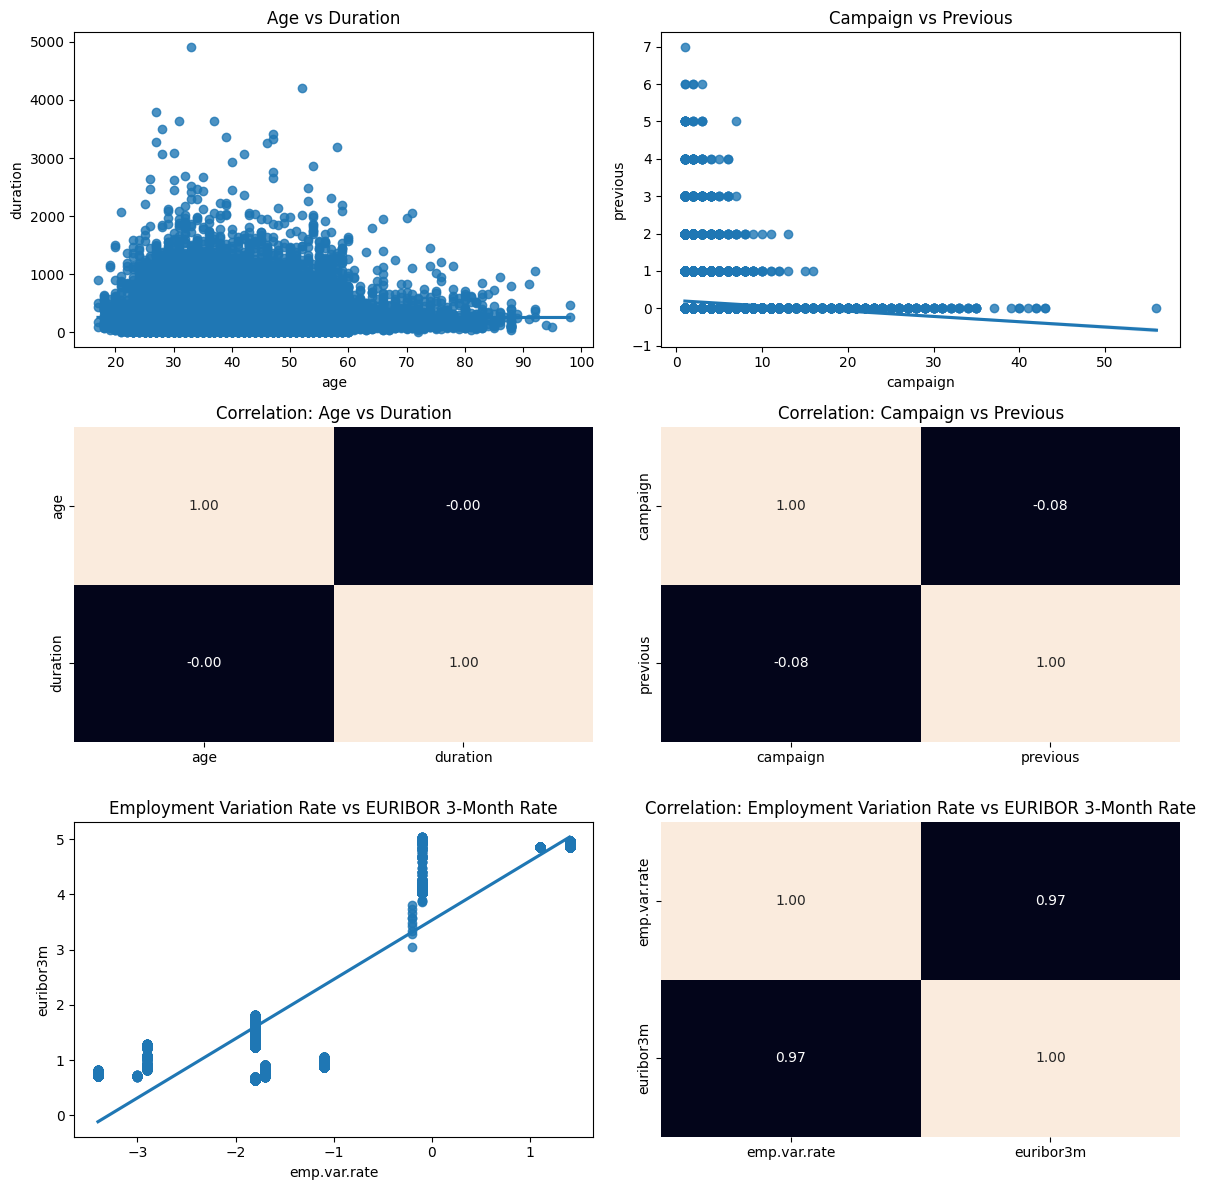

In [23]:

fig, axis = plt.subplots(3, 2, figsize=(12, 12))
sns.regplot(ax=axis[0, 0], data=df_encoded, x="age", y="duration")
axis[0, 0].set_title("Age vs Duration")

sns.heatmap(df[["age", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_title("Correlation: Age vs Duration")

sns.regplot(ax=axis[0, 1], data=df_encoded, x="campaign", y="previous")
axis[0, 1].set_title("Campaign vs Previous")

sns.heatmap(df[["campaign", "previous"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title("Correlation: Campaign vs Previous")

sns.regplot(ax=axis[2, 0], data=df_encoded, x="emp.var.rate", y="euribor3m")
axis[2, 0].set_title("Employment Variation Rate vs EURIBOR 3-Month Rate")

sns.heatmap(df_encoded[["emp.var.rate", "euribor3m"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)
axis[2, 1].set_title("Correlation: Employment Variation Rate vs EURIBOR 3-Month Rate")

plt.tight_layout()
plt.show()

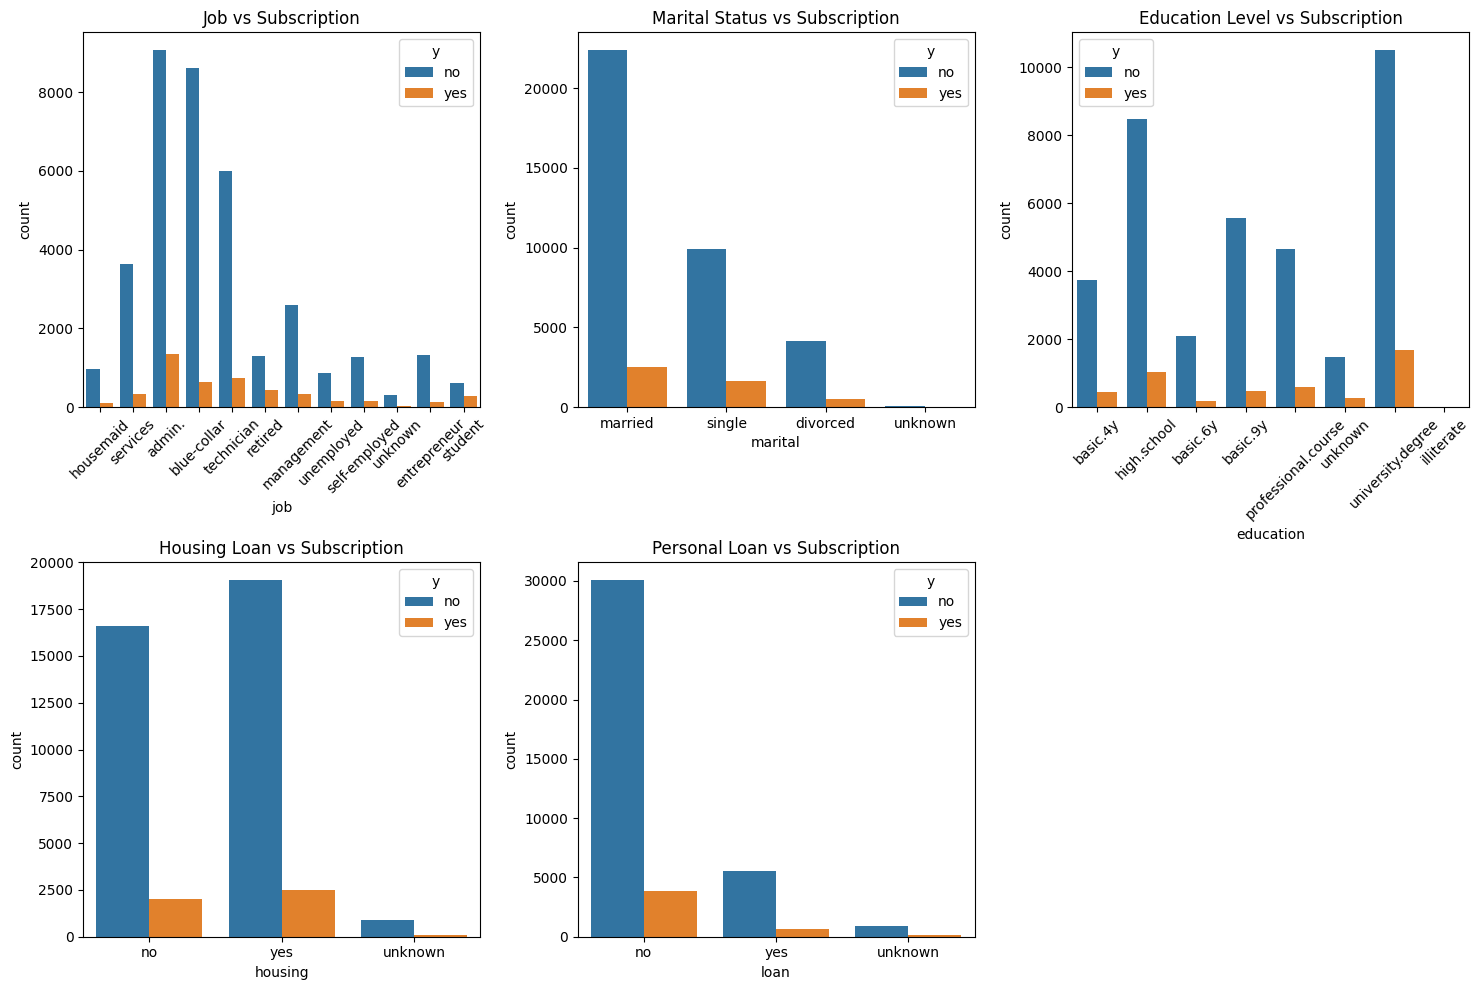

In [26]:

fig, axis = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(ax=axis[0, 0], data=df, x="job", hue="y")
axis[0, 0].set_title("Job vs Subscription")
axis[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axis[0, 1], data=df, x="marital", hue="y")
axis[0, 1].set_title("Marital Status vs Subscription")

sns.countplot(ax=axis[0, 2], data=df, x="education", hue="y")
axis[0, 2].set_title("Education Level vs Subscription")
axis[0, 2].tick_params(axis='x', rotation=45)

sns.countplot(ax=axis[1, 0], data=df, x="housing", hue="y")
axis[1, 0].set_title("Housing Loan vs Subscription")

sns.countplot(ax=axis[1, 1], data=df, x="loan", hue="y")
axis[1, 1].set_title("Personal Loan vs Subscription")

plt.tight_layout()
fig.delaxes(axis[1, 2])  

plt.show()

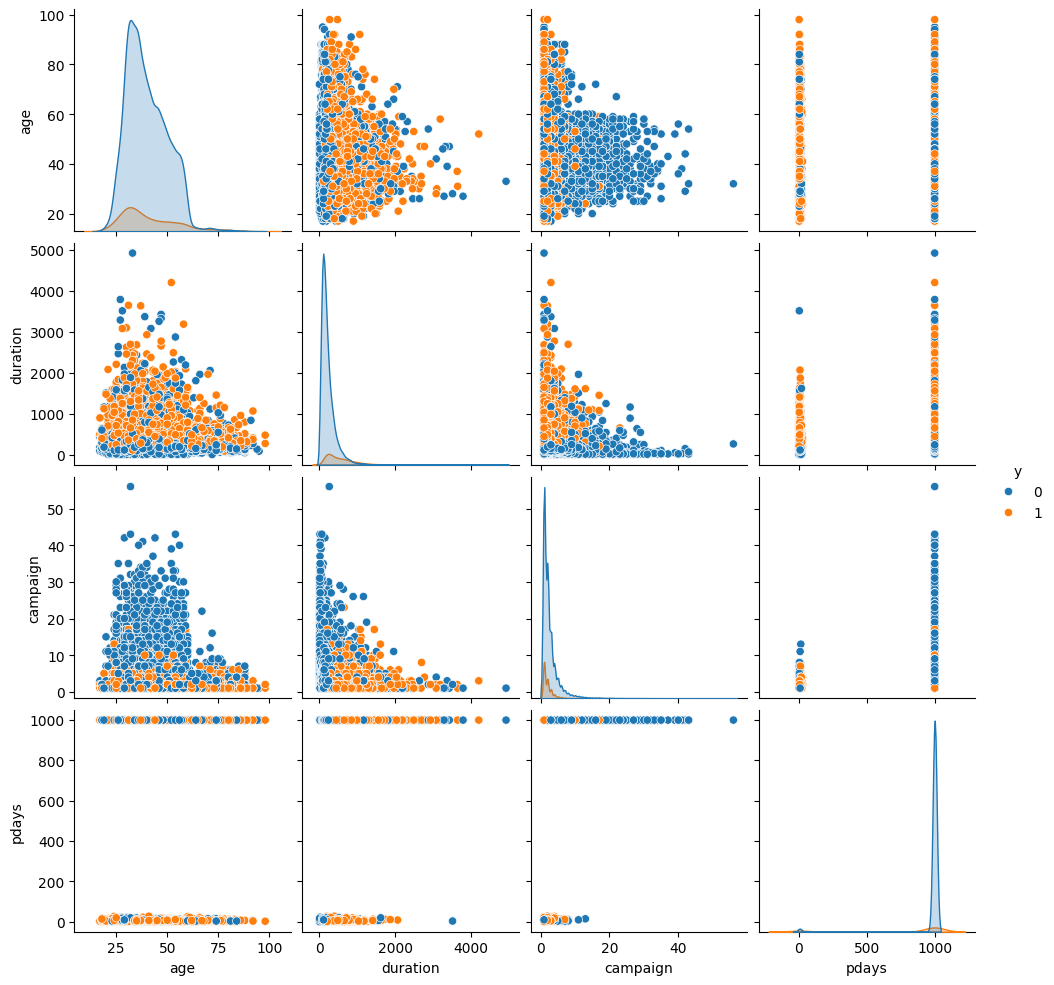

In [17]:
#Select subjoint
selected_columns_pairplot = ['age', 'duration', 'campaign', 'pdays', 'y']
df_selecte_pairplot = df_encoded[selected_columns_pairplot]

#subset pair creation
sns.pairplot(data=df_selecte_pairplot, hue="y")
plt.show()

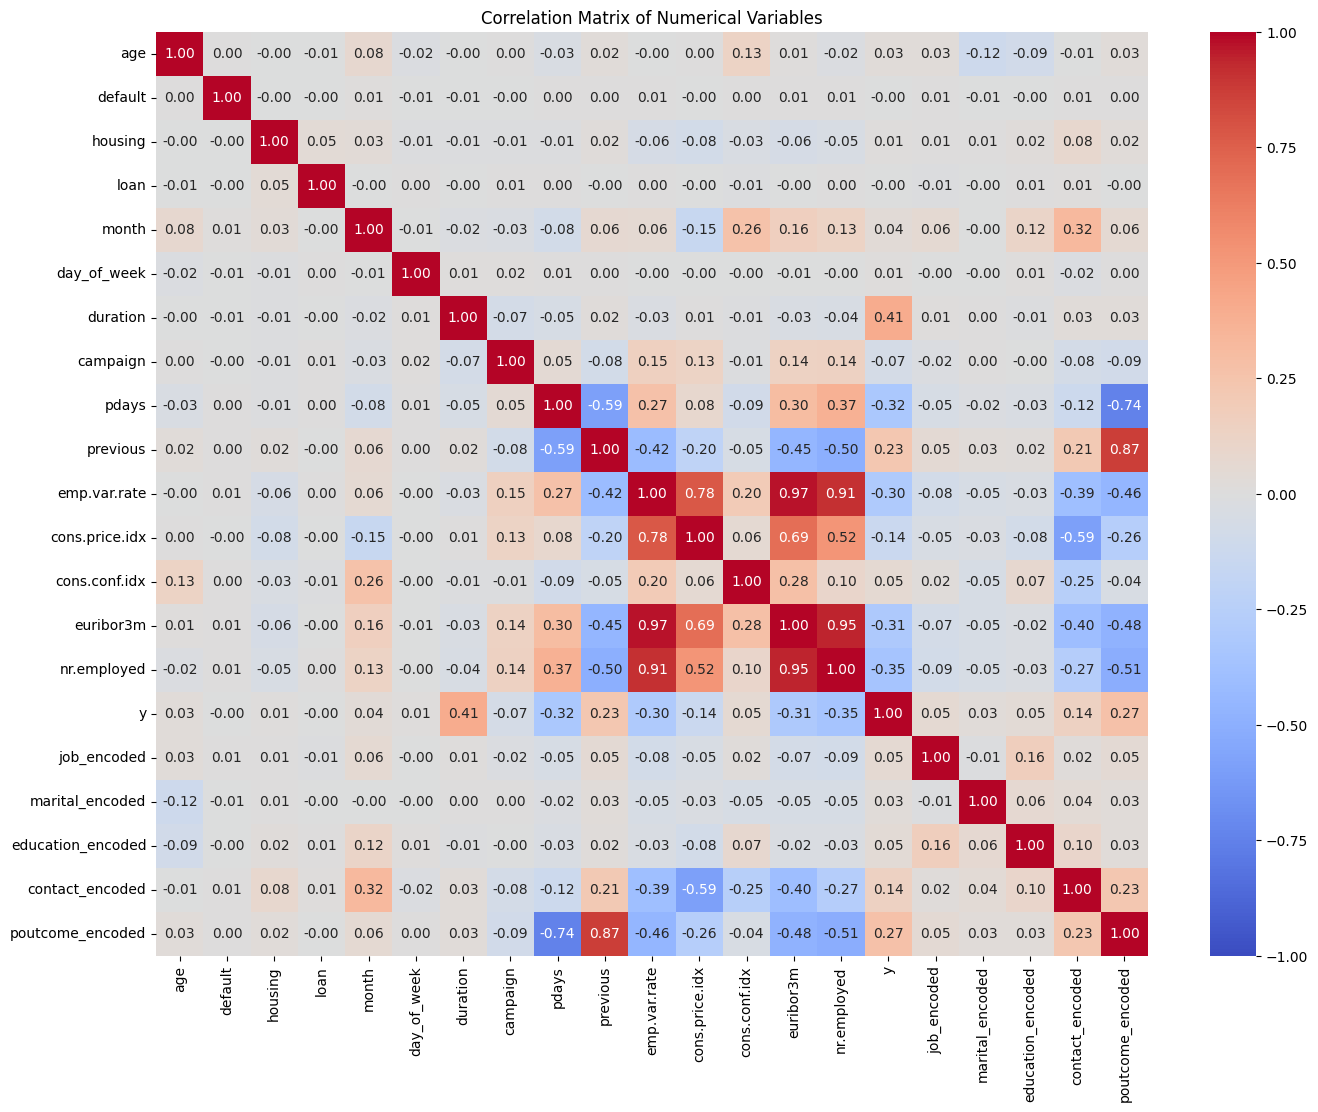

In [18]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(16, 12)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

## 5. Feature Engineering

In [17]:
df_encoded.describe()

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_encoded,marital_encoded,education_encoded,contact_encoded,poutcome_encoded
count,41176.00000,32580.000000,40186.000000,40186.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,0.000092,0.536779,0.155477,6.607733,2.979600,258.315815,2.567879,962.464810,0.173013,...,93.575720,-40.502863,3.621293,5167.034870,0.112663,3.673863,0.510637,3.277370,0.634714,0.169953
std,10.42068,0.009596,0.498652,0.362363,2.041013,1.411539,259.305321,2.770318,186.937102,0.494964,...,0.578839,4.627860,1.734437,72.251364,0.316184,2.454340,0.696794,2.185558,0.481516,0.455811
min,17.00000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,5.000000,2.000000,102.000000,1.000000,999.000000,0.000000,...,93.075000,-42.700000,1.344000,5099.100000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,6.000000,3.000000,180.000000,2.000000,999.000000,0.000000,...,93.749000,-41.800000,4.857000,5191.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,8.000000,4.000000,319.000000,3.000000,999.000000,0.000000,...,93.994000,-36.400000,4.961000,5228.100000,0.000000,4.000000,1.000000,6.000000,1.000000,0.000000
max,98.00000,1.000000,1.000000,1.000000,12.000000,5.000000,4918.000000,56.000000,999.000000,7.000000,...,94.767000,-26.900000,5.045000,5228.100000,1.000000,11.000000,3.000000,7.000000,1.000000,2.000000


In [18]:
df_encoded['economic_impact_score'] = df_encoded['emp.var.rate'] * df_encoded['euribor3m'] * df_encoded['nr.employed']

df_encoded.drop(columns=['emp.var.rate', 'euribor3m', 'nr.employed'], inplace=True)

df_encoded.head()

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,job_encoded,marital_encoded,education_encoded,contact_encoded,poutcome_encoded,economic_impact_score
0,56,0.0,0.0,0.0,5,1,261,1,999,0,93.994,-36.4,0,0,0,0,0,0,27733.9557
1,57,NaN,0.0,0.0,5,1,149,1,999,0,93.994,-36.4,0,1,0,1,0,0,27733.9557
2,37,0.0,1.0,0.0,5,1,226,1,999,0,93.994,-36.4,0,1,0,1,0,0,27733.9557
3,40,0.0,0.0,0.0,5,1,151,1,999,0,93.994,-36.4,0,2,0,2,0,0,27733.9557
4,56,0.0,0.0,1.0,5,1,307,1,999,0,93.994,-36.4,0,1,0,1,0,0,27733.9557


The economic_impact_score combines important economic indicators by multiplying them together. This new variable highlights when the economy is strong or weak. By using one score instead of multiple columns, we make the data simpler while still keeping the important economic information that could impact customer behavior.

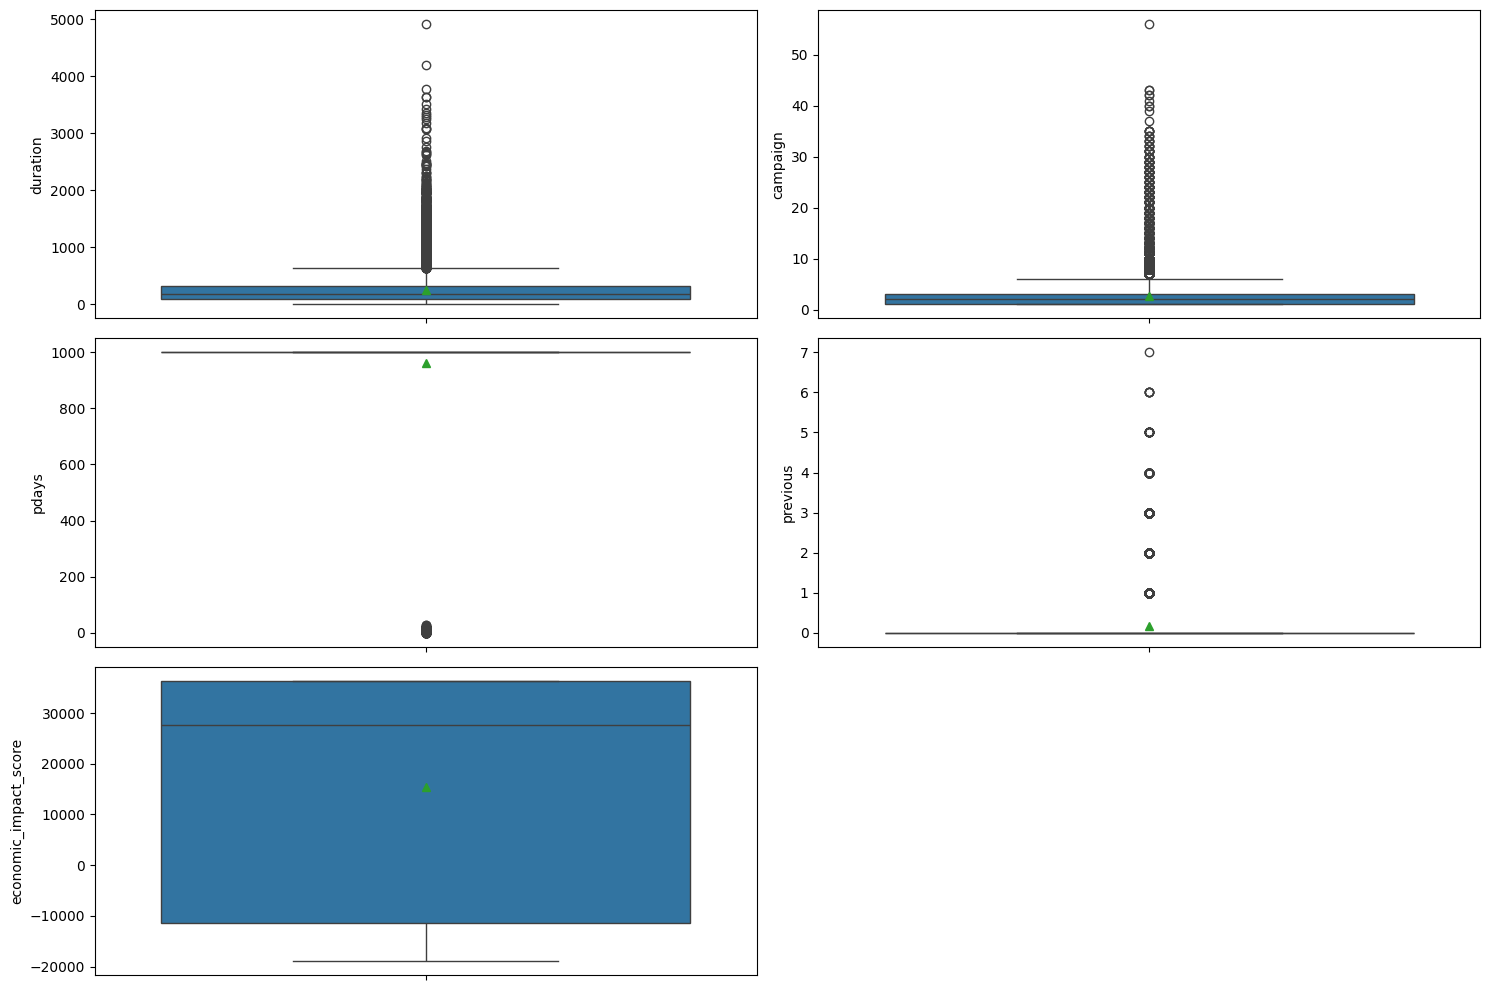

In [20]:
fig, axis = plt.subplots(3, 2, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=df_encoded, y="duration", showmeans=True)
sns.boxplot(ax=axis[0, 1], data=df_encoded, y="campaign", showmeans=True)
sns.boxplot(ax=axis[1, 0], data=df_encoded, y="pdays", showmeans=True)
sns.boxplot(ax=axis[1, 1], data=df_encoded, y="previous", showmeans=True)
sns.boxplot(ax=axis[2, 0], data=df_encoded, y="economic_impact_score", showmeans=True)
fig.delaxes(axis[2, 1])

plt.tight_layout()
plt.show()

Outlier Analysis: The duration and campaign variables have a high number of outliers, indicating different levels of engagement or intensity in the marketing strategy. These outliers might need special attention, as they could disproportionately impact model performance.

Default Values: The pdays variable has a strong default value at 999.

Feature Value Distributions: duration, campaign, and previous have skewed distributions while a few have significantly different values. 

In [21]:
# Creating a copy of our df to remove outliers 
df_encoded_no = df_encoded.copy()

In [22]:
# This function returns our new df without outliers and the features' limits.  
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'./ENC/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [23]:
#Applying the function to each feature with outliers
df_encoded_no['duration'] = remove_outliers(df_encoded_no['duration'], 'duration', allow_neg=False)
df_encoded_no['campaign'] = remove_outliers(df_encoded_no['campaign'], 'campaign', allow_neg=False)
df_encoded_no['previous'] = remove_outliers(df_encoded_no['previous'], 'previous', allow_neg=False)

In [24]:

constant_columns_no = [col for col in df_encoded_no.columns if df_encoded_no[col].nunique() <= 1]
print("Constant columns:", constant_columns_no)

Constant columns: ['previous']


In [25]:
constant_columns = [col for col in df_encoded.columns if df_encoded[col].nunique() <= 1]
print("Constant columns:", constant_columns)

Constant columns: []


In [26]:
df_encoded_no.drop(columns=constant_columns_no, inplace=True)
df_encoded.drop(columns=constant_columns, inplace=True)


In [27]:
print("Constant columns:", constant_columns_no)

Constant columns: ['previous']


In [28]:
if 'previous' in df_encoded_no.columns:
    df_encoded_no.drop(columns=['previous'], inplace=True)

if 'previous' in df_encoded.columns:
    df_encoded.drop(columns=['previous'], inplace=True)

In [29]:
constant_columns_no = [col for col in df_encoded_no.columns if df_encoded_no[col].nunique() <= 1]
print("Constant columns in df_encoded_no after dropping:", constant_columns_no)

constant_columns = [col for col in df_encoded.columns if df_encoded[col].nunique() <= 1]
print("Constant columns in df_encoded after dropping:", constant_columns)

Constant columns in df_encoded_no after dropping: []
Constant columns in df_encoded after dropping: []


In [30]:
df_encoded.isna().sum()

age                         0
default                  8596
housing                   990
loan                      990
month                       0
day_of_week                 0
duration                    0
campaign                    0
pdays                       0
cons.price.idx              0
cons.conf.idx               0
y                           0
job_encoded                 0
marital_encoded             0
education_encoded           0
contact_encoded             0
poutcome_encoded            0
economic_impact_score       0
dtype: int64

In [31]:
#Numerical imputation: df_encoded
df_encoded['default'].fillna(df_encoded['default'].mode()[0], inplace=True)
df_encoded['housing'].fillna(df_encoded['housing'].mode()[0], inplace=True)
df_encoded['loan'].fillna(df_encoded['loan'].mode()[0], inplace=True)

#Numerical imputation: df_encoded_no
df_encoded_no['default'].fillna(df_encoded_no['default'].mode()[0], inplace=True)
df_encoded_no['housing'].fillna(df_encoded_no['housing'].mode()[0], inplace=True)
df_encoded_no['loan'].fillna(df_encoded_no['loan'].mode()[0], inplace=True)

In [32]:
df_encoded.isna().sum()

age                      0
default                  0
housing                  0
loan                     0
month                    0
day_of_week              0
duration                 0
campaign                 0
pdays                    0
cons.price.idx           0
cons.conf.idx            0
y                        0
job_encoded              0
marital_encoded          0
education_encoded        0
contact_encoded          0
poutcome_encoded         0
economic_impact_score    0
dtype: int64

In [33]:
# Define the split function
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


In [34]:
#Dataframe with outliers
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('y', df_encoded)

#Dataframe without outliers
X_train_without_outliers, X_test_without_outliers, _, _ = split('y', df_encoded_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

norm

In [35]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
 
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'./ENC/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [36]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

minmax

In [37]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'./ENC/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [38]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

## 6. Feature Selection 

In [39]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()
    
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])
    
    dump(selection_model, open(f'./ENC/selection_model_{reference}.sav', 'wb'))
    
    return X_train_sel, X_test_sel

In [ ]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 7, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 7, 'without_outliers')

In [42]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

In [43]:
dfs_train = [X_train_with_outliers_sel, X_train_without_outliers_sel, 
             X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel, 
             X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel]

dfs_test = [X_test_with_outliers_sel, X_test_without_outliers_sel, 
            X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel, 
            X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel]

In [44]:
# Train data frames
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# Test data frames
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pickle import dump